<a href="https://colab.research.google.com/github/ardaffa2000/Image-Classification-1-Assignment/blob/main/Tugas_11_Klasifikasi_Daun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
cd /content/drive/My Drive/Colab Notebooks 

/content/drive/My Drive/Colab Notebooks


In [141]:
ls

 3scene/                                'Copy of simplen ann.ipynb'
 best_weight_scene_mobileNet.h5          dataset/
'Copy of scenes_nn_4 layers (1).ipynb'   nnmodel_scene/
'Copy of scenes_nn_4 layers.ipynb'      'Tugas 11: Klasifikasi Daun.ipynb'


In [142]:
# import the necessary packages
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [143]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [144]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [145]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [146]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [147]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [148]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 128, 128, 3)
(147, 128, 128, 3)


In [149]:
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization

In [150]:
#from keras.layers import Convolution2D, MaxPooling2D
#from keras.models import Sequential
#from keras.layers.core import Flatten

#modela = Sequential()
#modela.add(Convolution2D(8,3,3, input_shape=(128,128,3)))
#modela.add(MaxPooling2D((2,2)))
#modela.add(Convolution2D(16,3,3))
#modela.add(MaxPooling2D((2,2)))
#modela.add(Convolution2D((16,3,3)))
#modela.add(MaxPooling2D((2,2)))
#FCN
#modela.add(Flatten())
#modela.add(Dense(140, activation='relu'))
#modela.add(Dense(5, activation='softmax'))

#modela.summary()



In [151]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten

modela = Sequential()
modela.add(Convolution2D(16, kernel_size=(3, 3), input_shape=(128,128,3), padding='same'))
modela.add(Convolution2D(16, kernel_size=(3, 3), padding='same'))
#FCN
modela.add(Flatten())
modela.add(Dense(140, activation='relu'))
modela.add(Dense(5, activation='softmax'))

modela.build()

modela.summary()



Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 128, 128, 16)      2320      
_________________________________________________________________
flatten_10 (Flatten)         (None, 262144)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 140)               36700300  
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 705       
Total params: 36,703,773
Trainable params: 36,703,773
Non-trainable params: 0
_________________________________________________________________


In [152]:
modela.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 128, 128, 16)      2320      
_________________________________________________________________
flatten_10 (Flatten)         (None, 262144)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 140)               36700300  
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 705       
Total params: 36,703,773
Trainable params: 36,703,773
Non-trainable params: 0
_________________________________________________________________


In [153]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
modela.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [154]:
H = modela.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 44ms/step - loss: 39.8297 - accuracy: 0.2489 - val_loss: 12.3154 - val_accuracy: 0.2449
Epoch 2/25
14/14 [==============================] - 0s 32ms/step - loss: 7.7324 - accuracy: 0.2763 - val_loss: 1.7428 - val_accuracy: 0.4626
Epoch 3/25
14/14 [==============================] - 0s 32ms/step - loss: 4.2381 - accuracy: 0.3699 - val_loss: 1.9735 - val_accuracy: 0.4218
Epoch 4/25
14/14 [==============================] - 0s 32ms/step - loss: 2.3018 - accuracy: 0.5137 - val_loss: 3.8818 - val_accuracy: 0.3741
Epoch 5/25
14/14 [==============================] - 0s 32ms/step - loss: 1.5209 - accuracy: 0.5936 - val_loss: 1.6248 - val_accuracy: 0.5102
Epoch 6/25
14/14 [==============================] - 0s 33ms/step - loss: 1.3835 - accuracy: 0.6187 - val_loss: 2.1795 - val_accuracy: 0.4286
Epoch 7/25
14/14 [==============================] - 0s 33ms/step - loss: 0.9345 - accuracy: 0.6826 - val_loss: 1.4591 - val_accuracy: 0.5782
Epoch 8/25


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


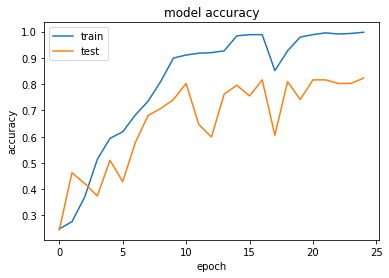

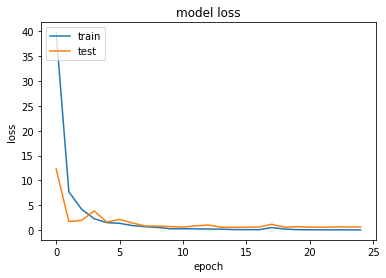

In [155]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [156]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = modela.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       1.00      0.76      0.86        29
      GMB_03       0.73      0.88      0.80        25
      GMB_05       0.80      0.89      0.85        37
      GMB_07       0.76      0.81      0.78        36
      GMB_09       0.94      0.75      0.83        20

    accuracy                           0.82       147
   macro avg       0.85      0.82      0.83       147
weighted avg       0.84      0.82      0.82       147



In [157]:
modela.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets
